<a href="https://colab.research.google.com/github/eSeohyeon/2025-1_CV/blob/main/CV_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW#2 2021041076 이서현

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### HW#2-1

In [ ]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif'

--2025-04-10 13:16:27--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif’

Fig0309(a)(washed_o 100%[===================>] 575.31K  --.-KB/s    in 0.05s   

2025-04-10 13:16:28 (11.7 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif’ saved [589115/589115]



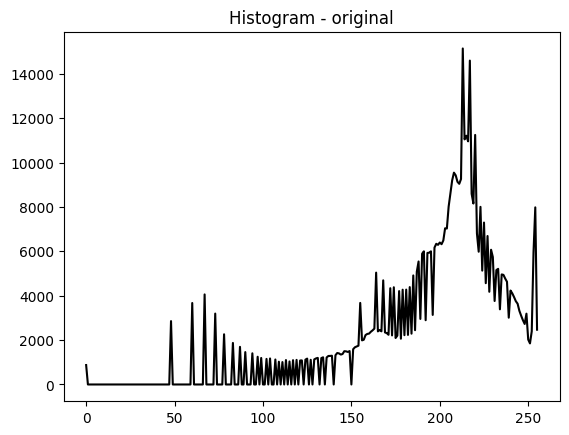

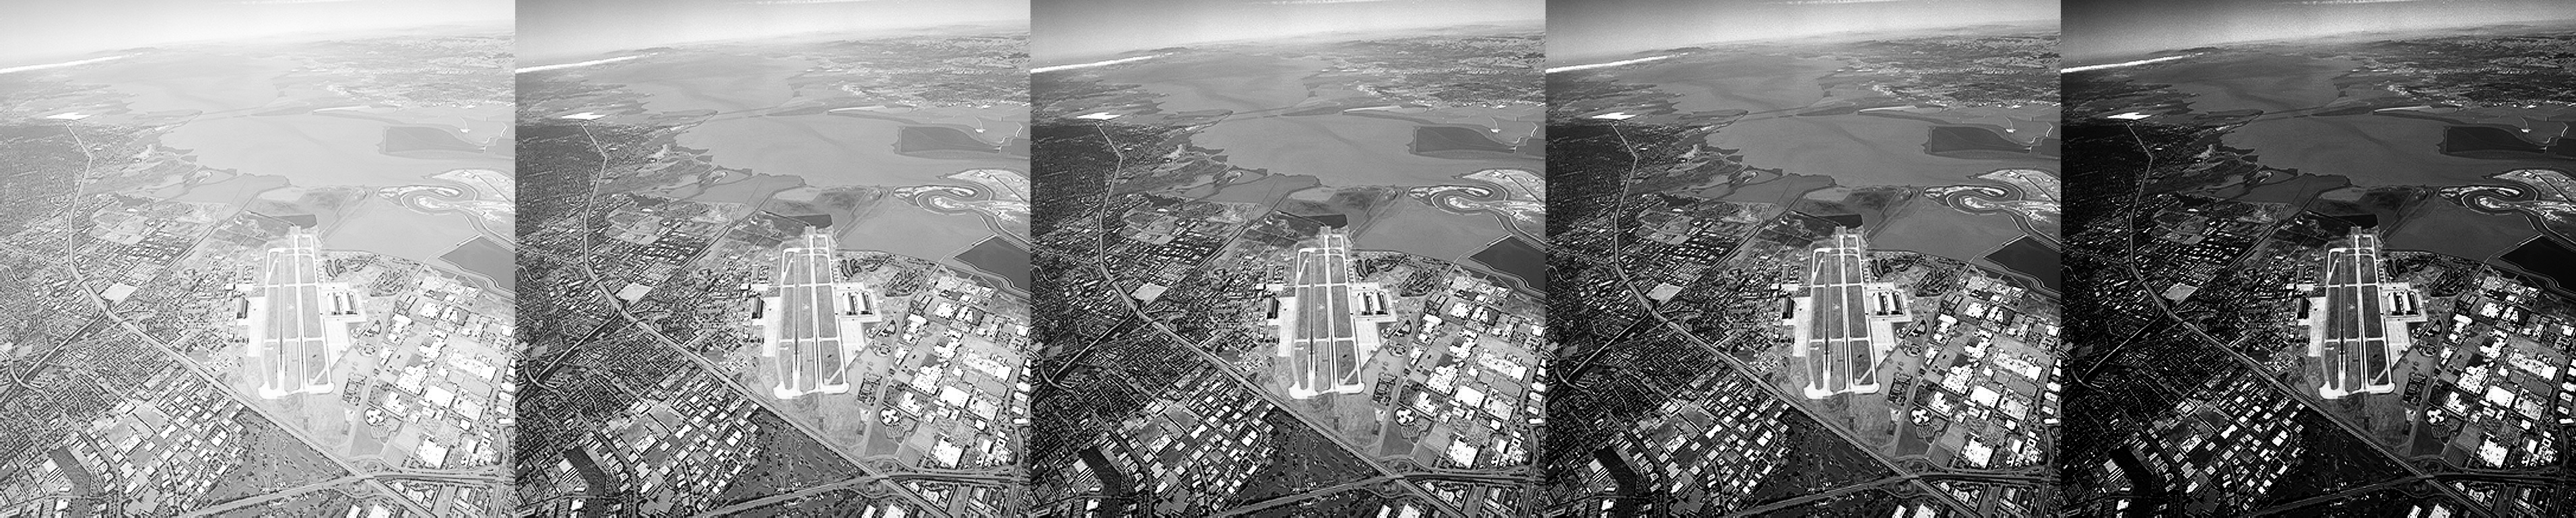

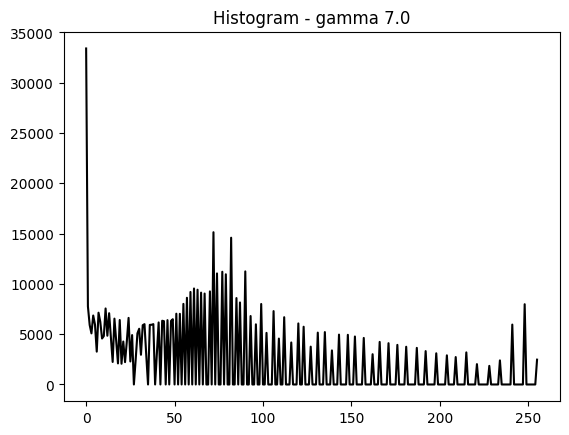

In [ ]:
img = cv2.imread('Fig0309(a)(washed_out_aerial_image).tif', cv2.IMREAD_GRAYSCALE)
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256]) # 원본 영상의 히스토그램 계산
plt.plot(hist_original, color='black')
plt.title('Histogram - original')
plt.show()

# 원본 영상의 히스토그램을 통해 밝기가 밝은 쪽에 많이 치우쳐져 있음을 확인.
# 영상의 밝기를 낮추기 위해 감마 보정을 사용.

def gamma(image, gamma):
    image_normal = image/255.0 # 픽셀 정규화
    return np.uint8(255*(image_normal**gamma))

# 감마 보정( 2.0, 3.0, 7.0, 4.0 )
gamma1 = gamma(img, 2.0)
gamma2 = gamma(img, 3.0)
# 2.0과 3.0의 차이가 생각보다 크지 않아서 한 번에 7.0까지 올려보았다.
gamma7 = gamma(img, 7.0)
gamma4 = gamma(img, 4.0)

show = np.hstack((img, gamma1, gamma2, gamma4, gamma7))
cv2_imshow(show)
# 감마 값이 커질수록 영상이 어두워지는 것을 확인할 수 있다.

hist_gamma7 = cv2.calcHist([gamma7], [0], None, [256], [0, 256])
plt.plot(hist_gamma7, color='black')
plt.title('Histogram - gamma 7.0')
plt.show()
# 감마값이 7.0인 영상의 히스토그램을 보면 원본 영상에 비해 밝기 값이 어두운 쪽으로 많이 치우쳐져 있음을 확인할 수 있다.

### HW#2-2

In [105]:
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310\(b\)\(washed_out_pollen_image\).tif

--2025-04-11 14:50:28--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791311 (773K) [image/tiff]
Saving to: ‘Fig0310(b)(washed_out_pollen_image).tif’

Fig0310(b)(washed_o 100%[===================>] 772.76K  --.-KB/s    in 0.01s   

2025-04-11 14:50:28 (62.7 MB/s) - ‘Fig0310(b)(washed_out_pollen_image).tif’ saved [791311/791311]



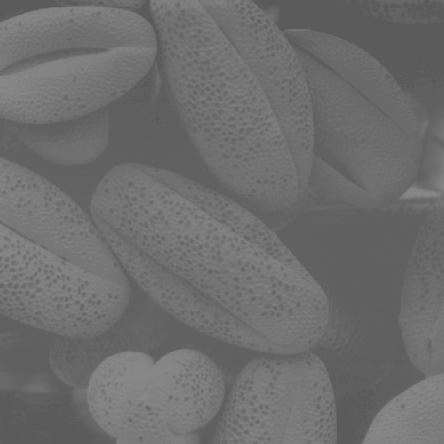

ㄴ 원본 영상


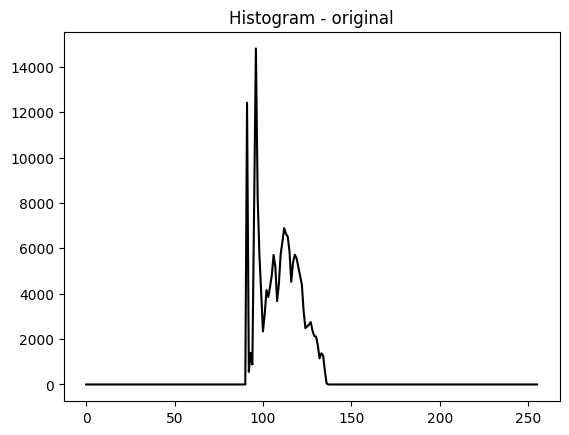

In [126]:
img = cv2.imread('Fig0310(b)(washed_out_pollen_image).tif',  cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5)
cv2_imshow(img)
print('ㄴ 원본 영상')
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist_original, color='black')
plt.title('Histogram - original')
plt.show()




### HW#2-3

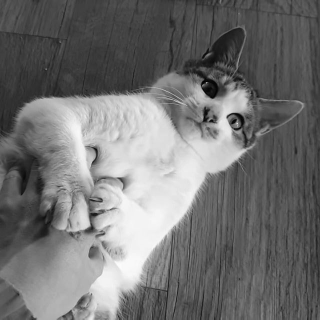

ㄴ 원본


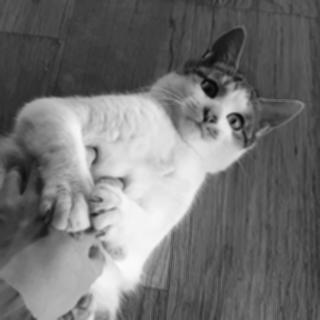

ㄴ mask1


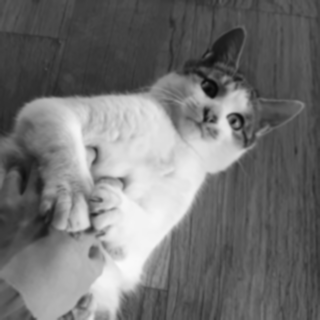

ㄴ mask2


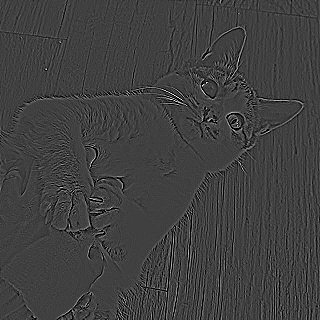

ㄴ mask3


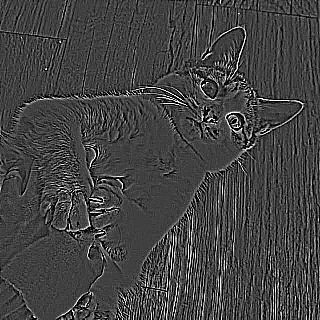

ㄴ mask4


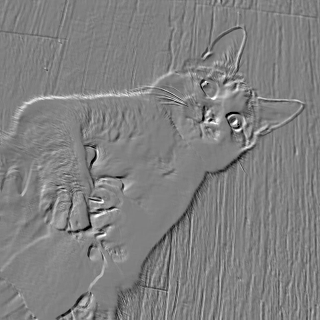

ㄴ mask5


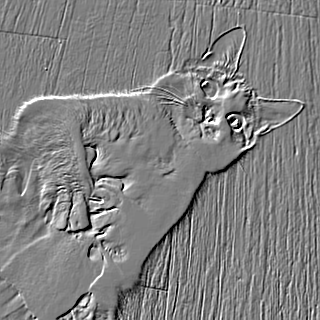

ㄴ mask6


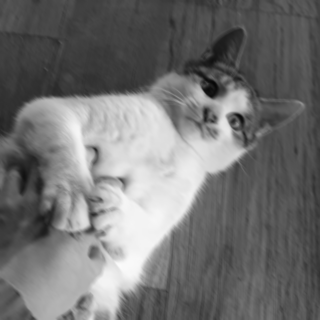

In [93]:
img = cv2.imread('mu.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize = (0, 0), fx=0.5, fy=0.5)

mask1 = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

mask2 = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
])

mask3 = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype = np.float32)

mask4 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

mask5 = np.array([
    [-1, 0, 0],
    [0, 0, 0],
    [0, 0, 1]
])

mask6 = np.array([
    [-1, -1, 0],
    [-1, 0, 1],
    [0, 1, 1]
])

mask_motion = np.array([
    [0.0304, 0.0501, 0, 0, 0],
    [0.0501, 0.1771, 0.0519, 0, 0],
    [0, 0.0519, 0.1771, 0.0519, 0],
    [0, 0, 0.0519, 0.1771, 0.0501],
    [0, 0, 0, 0.0501, 0.0304]
])

img32 = np.float32(img)

# mask1과 mask2는 스무딩 효과가 나타남을 확인했다.
masked1 = cv2.filter2D(img, -1, mask1) # 박스
masked2 = cv2.filter2D(img, -1, mask2) # 가우시안

# mask3과 mask4를 보고 대비되는 부분을 더욱 강조하는 샤프닝 효과를 보일 거라고 예상했다.
# 실제 연산 적용 결과, 잘못된 결과가 나왔고, 원인은 데이터형 문제로 추청된다.
#
masked3 = np.uint8(np.clip(cv2.filter2D(img32, -1, mask3)+64, 0, 255))
masked4 = np.uint8(np.clip(cv2.filter2D(img32, -1, mask4)+64, 0, 255))

# mask5와 mask6은 엠보싱 효과가 있다. - 주변 픽셀과의 차이를 강조하는 마스크
masked5 = np.uint8(np.clip(cv2.filter2D(img32, -1, mask5)+128, 0, 255))
masked6 = np.uint8(np.clip(cv2.filter2D(img32, -1, mask6)+128, 0, 255))

masked_motion = cv2.filter2D(img, -1, mask_motion)

cv2_imshow(img)
print('ㄴ 원본')
cv2_imshow(masked1)
print('ㄴ mask1')
cv2_imshow(masked2)
print('ㄴ mask2')
cv2_imshow(masked3)
print('ㄴ mask3')
cv2_imshow(masked4)
print('ㄴ mask4')
cv2_imshow(masked5)
print('ㄴ mask5')
cv2_imshow(masked6)
print('ㄴ mask6')

# 궁금해서 모션 필터도 적용해봤다. 약간 흔들린 효과를 확인할 수 있었다.
cv2_imshow(masked_motion)



### HW#2-4

In [95]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg'

--2025-04-11 14:41:32--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824868 (806K) [image/jpeg]
Saving to: ‘school.jpg’

school.jpg          100%[===================>] 805.54K  --.-KB/s    in 0.008s  

2025-04-11 14:41:33 (98.3 MB/s) - ‘school.jpg’ saved [824868/824868]



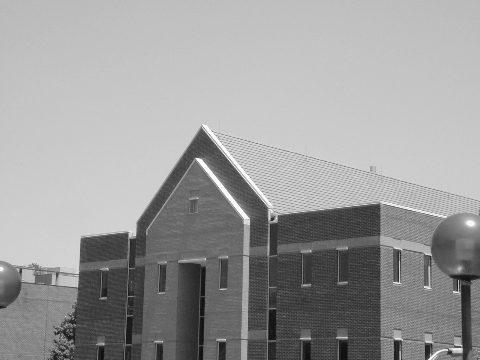

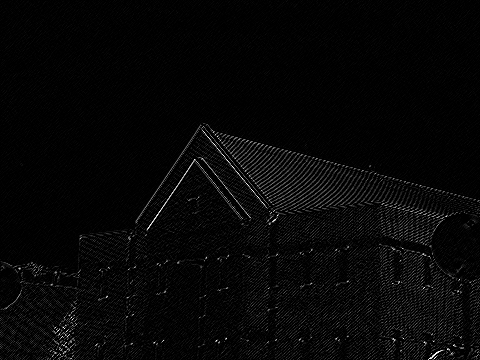

ㄴ 45도 방향 엣지


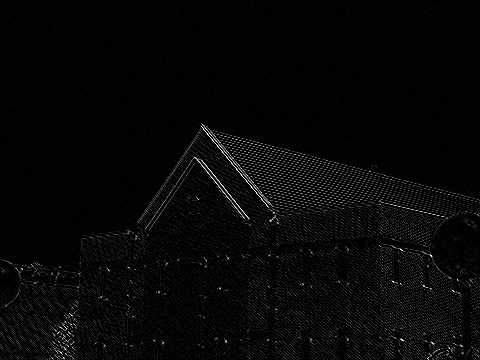

ㄴ -45도 방향 엣지


In [96]:
img = cv2.imread('school.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize = (0, 0), fx = 0.3, fy = 0.3)
cv2_imshow(img)

# 45도 방향 엣지를 검출하기 위한 마스크
mask_45 = np.array([
    [-1, -1, 2],
    [-1, 2, -1],
    [2, -1, -1]
])

# -45도 방향 엣지를 검출하기 위한 마스크
mask_minus_45 = np.array([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
])

# 각 방향에 대해 엣지 검출
edge_45 = cv2.filter2D(img, -1, mask_45)
edge_minus_45 = cv2.filter2D(img, -1, mask_minus_45)

cv2_imshow(edge_45)
print('ㄴ 45도 방향 엣지')
cv2_imshow(edge_minus_45)
print('ㄴ -45도 방향 엣지')

### HW#2-5

In [97]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg'

--2025-04-11 14:41:44--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73452 (72K) [image/jpeg]
Saving to: ‘finger.jpg’

finger.jpg          100%[===================>]  71.73K  --.-KB/s    in 0.002s  

2025-04-11 14:41:44 (28.9 MB/s) - ‘finger.jpg’ saved [73452/73452]



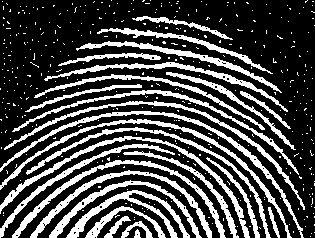

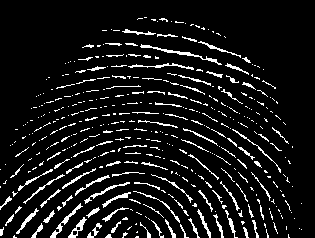

ㄴ 침식 적용


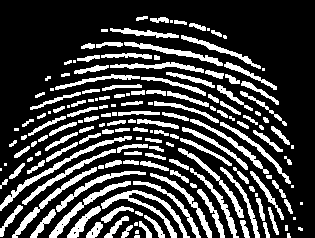

ㄴ 팽창 적용


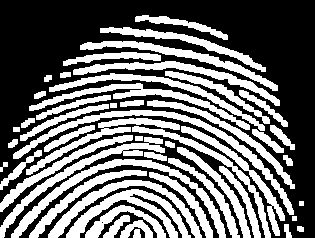

ㄴ 두 번째 팽창


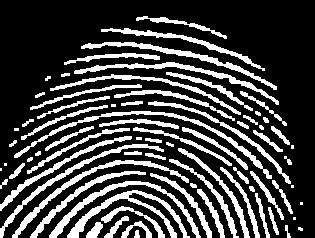

ㄴ 두 번째 침식 (최종)


In [98]:
img = cv2.imread('finger.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

se = np.uint8([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# 노이즈를 제거하기 위해 침식 후 팽창 적용
eroded = cv2.erode(img, se, iterations =1)
cv2_imshow(eroded)
print('ㄴ 침식 적용')
dilated = cv2.dilate(eroded, se, iterations =1)
cv2_imshow(dilated)
print('ㄴ 팽창 적용')

# 중간중간 끊긴 부분을 메꾸기 위해 팽창 후 침식 적용
dilated2 = cv2.dilate(dilated, se, iterations =1)
cv2_imshow(dilated2)
print('ㄴ 두 번째 팽창')
eroded2 = cv2.erode(dilated2, se , iterations =1)


# 주변 노이즈와 지문에 끊어진 부분이 개선된 영상을 확인할 수 있다.
cv2_imshow(eroded2)
print('ㄴ 두 번째 침식 (최종)')



### HW#2-6

In [ ]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif'

--2025-04-11 04:51:26--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30092 (29K) [image/tiff]
Saving to: ‘Fig0905(a)(wirebond-mask).tif’

Fig0905(a)(wirebond 100%[===================>]  29.39K  --.-KB/s    in 0.004s  

2025-04-11 04:51:26 (7.13 MB/s) - ‘Fig0905(a)(wirebond-mask).tif’ saved [30092/30092]



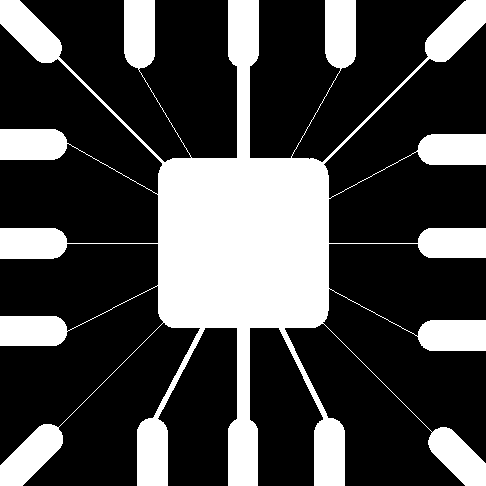

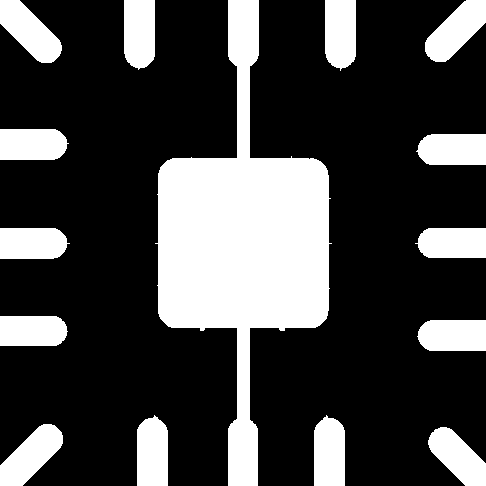

In [ ]:
img = cv2.imread('Fig0905(a)(wirebond-mask).tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

se = np.uint8([
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
])

# 원래 두께를 유지한 채로 가장 두꺼운 선분만 남기기 위해 열림 연산을 사용했다.
# 3x3, 5x5 구조요소로는 두 번째로 두꺼운 선분이 지워지지 않아 7x7 구조요소를 사용했다.
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
cv2_imshow(opened)


### HW#2-7

In [99]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif'

--2025-04-11 14:45:34--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262750 (257K) [image/tiff]
Saving to: ‘Fig0939(a)(headCT-Vandy).tif.1’

Fig0939(a)(headCT-V 100%[===================>] 256.59K  --.-KB/s    in 0.005s  

2025-04-11 14:45:34 (52.1 MB/s) - ‘Fig0939(a)(headCT-Vandy).tif.1’ saved [262750/262750]



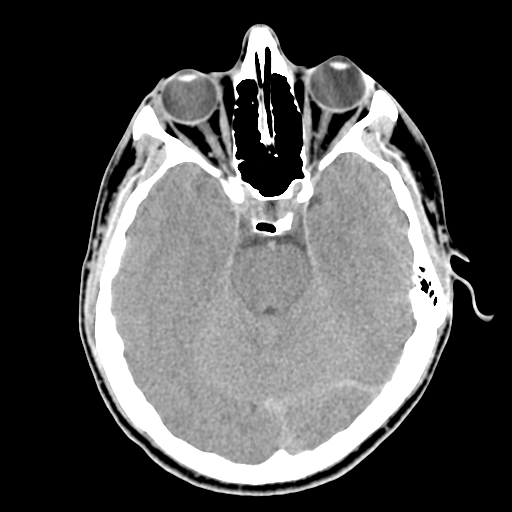

ㄴ 원본 영상


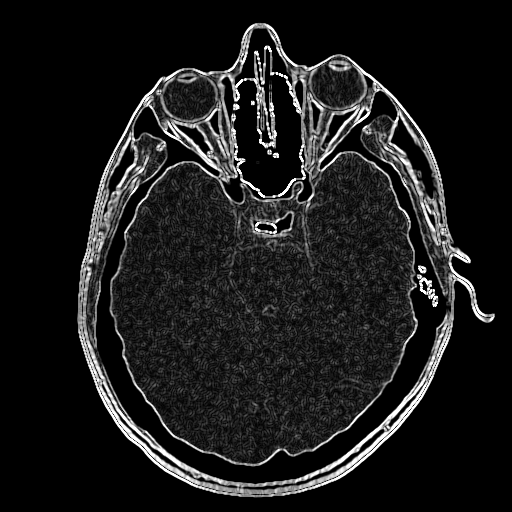

ㄴ Sobel 연산자를 통한 엣지검출


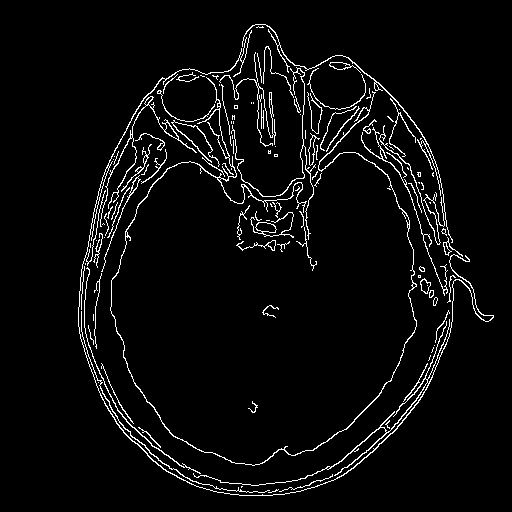

ㄴ Canny를 통한 엣지 검출


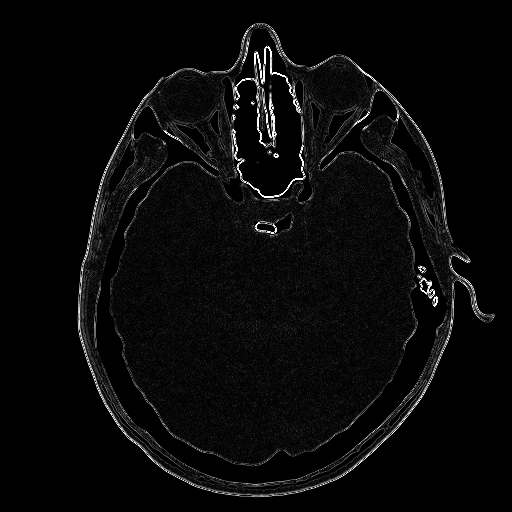

ㄴ Laplacian을 통한 엣지 검출


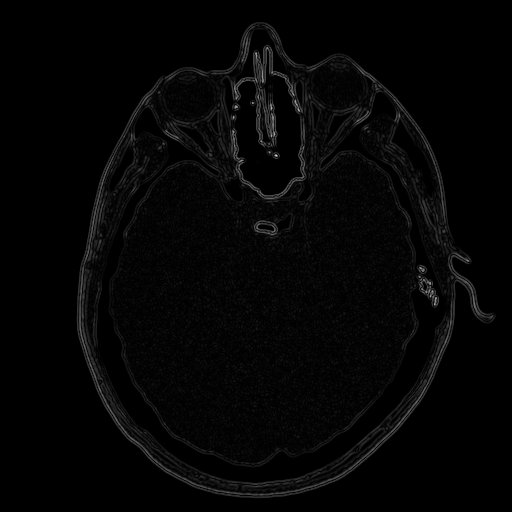

ㄴ LoG


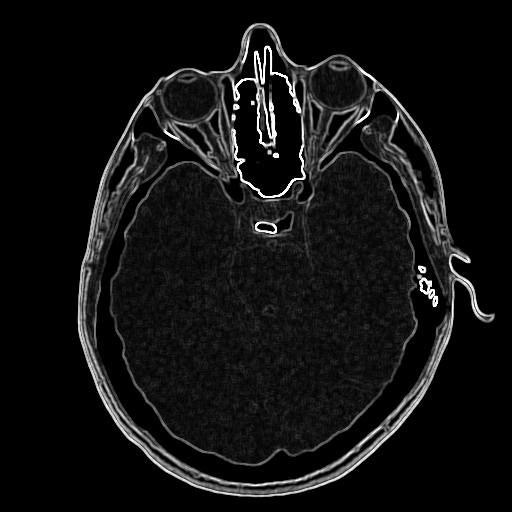

ㄴ morphological gradient를 통한 엣지 검출


In [100]:
img = cv2.imread('Fig0939(a)(headCT-Vandy).tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print('ㄴ 원본 영상')

# Sobel 함수를 통해 엣지 검출
grad_x = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize = 3)
grad_y = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize = 3)
sobel_x = cv2.convertScaleAbs(grad_x)
sobel_y = cv2.convertScaleAbs(grad_y)
edge = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0) # 엣지 강도
cv2_imshow(edge)
print('ㄴ Sobel 연산자를 통한 엣지검출')

# Canny 함수를 통해 엣지 검출
canny = cv2.Canny(img, 100, 250)
# Tlow = 100, Thigh = 250, Thigh가 더 낮거나 Thigh와 Tlow의 차가 줄어들수록 뇌 내부의 디테일한 주름도 같이 검출되는 것을 확인할 수 있었다.
cv2_imshow(canny)
print('ㄴ Canny를 통한 엣지 검출')

# Laplacian을 통해 엣지 검출
laplacian = cv2.Laplacian(img, cv2.CV_32F)
laplacian = cv2.convertScaleAbs(laplacian)
cv2_imshow(laplacian)
print('ㄴ Laplacian을 통한 엣지 검출')

# LoG를 통해 엣지 검출
gaussian_blurred = cv2.GaussianBlur(img, (3, 3), 1.0)
log = cv2.Laplacian(gaussian_blurred, cv2.CV_32F)
log = cv2.convertScaleAbs(log)
# 노이즈가 별로 없는 영상에 가우시안 블러를 적용하고 엣지 검출을 하니, 오히려 흐릿하고 디테일이 부족해서 알아보기 어려움.
cv2_imshow(log)
print('ㄴ LoG')

# Morphological Gradient 를 통해 엣지 검출
# 팽창 - 침식
se = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(img, se, iterations = 1)
eroded = cv2.erode(img, se, iterations = 1)
morphological_gradient = dilated - eroded
cv2_imshow(morphological_gradient)
print('ㄴ morphological gradient를 통한 엣지 검출')


# 비교
# Sobel : 내부의 디테일한 부분까지도 엣지가 검출되었고, 엣지의 두께가 두껍다.
# Canny : 이진화되어 경계가 명확해 보이지만, 큰 부분과 부분의 경계가 아닌 내부의 디테일한 요소들도 엣지로 검출이 되어 뭐가 뭔지 알아보기 가장 어려움.
# Laplacian : 다른 엣지 검출 알고리즘에 비해 경계의 두께가 얇고 디테일 표현은 가장 적고, 내부의 밝기 변화가 비교적 적은 부분은 경계가 연하다.
# Morphological Gradient : 다른 엣지 검출 알고리즘에 비해 엣지가 가장 명확하게 검출되었다.


### HW#2-8

In [29]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif'

--2025-04-11 12:12:07--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321002 (313K) [image/tiff]
Saving to: ‘Fig0938(a)(cygnusloop_Xray_original).tif’

Fig0938(a)(cygnuslo 100%[===================>] 313.48K  --.-KB/s    in 0.006s  

2025-04-11 12:12:07 (47.6 MB/s) - ‘Fig0938(a)(cygnusloop_Xray_original).tif’ saved [321002/321002]



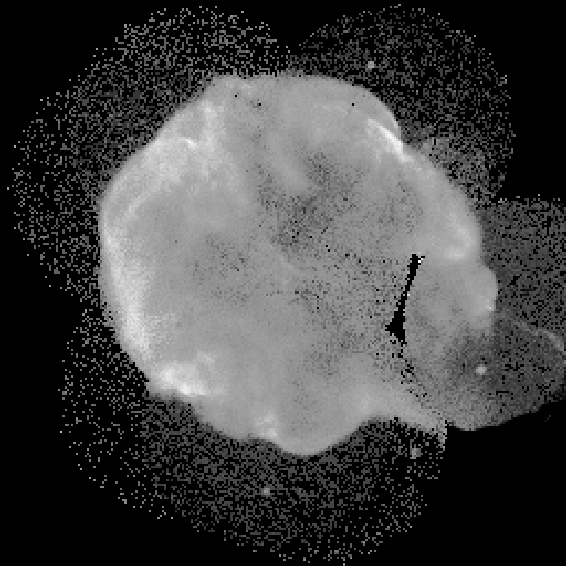

ㄴ 원본 영상


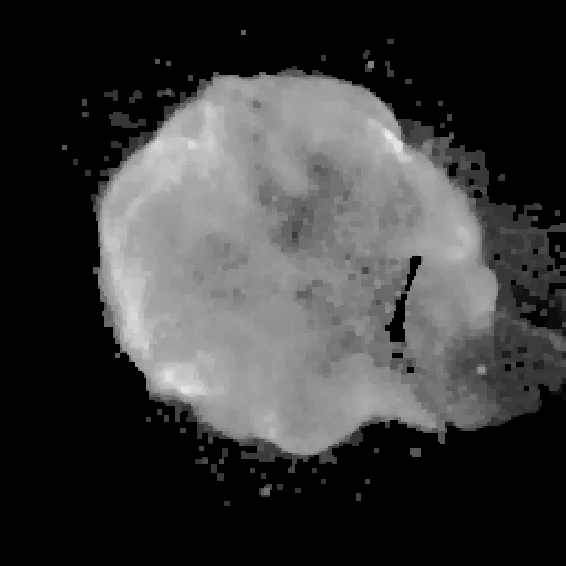

ㄴ morphological smoothing 적용


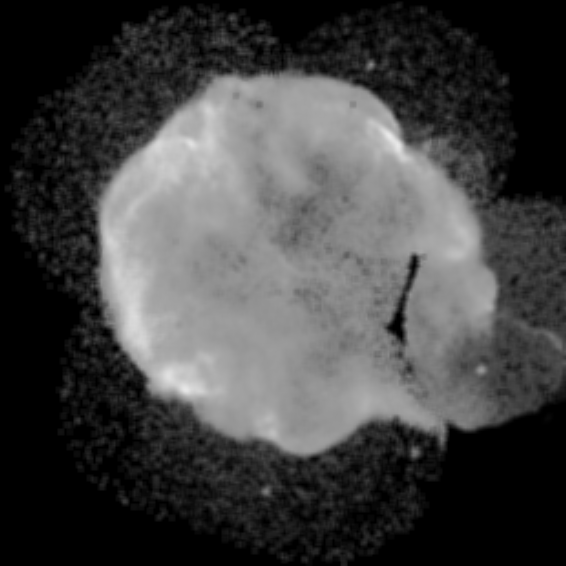

ㄴ gaussian blur 적용


In [101]:
img = cv2.imread('Fig0938(a)(cygnusloop_Xray_original).tif')
cv2_imshow(img)
print('ㄴ 원본 영상')

# 중앙의 하얀 구름 형태 주변에 퍼져있는 노이즈 제거

# Morphological smoothing 연산 적용
# 열림 -> 닫힘
se = np.ones((5, 5), np.uint8)
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
morphological_smoothing = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, se)
cv2_imshow(morphological_smoothing)
print('ㄴ morphological smoothing 적용')

# 스무딩 적용 - 가우시안 블러
gaussian_blurred = cv2.GaussianBlur(img, (7, 7), 5.0)
cv2_imshow(gaussian_blurred)
print('ㄴ gaussian blur 적용')

# 비교
# morphological smoothing은 중앙 구름 부분이 조금 흐려지긴 하지만, 주변 노이즈는 지워지는 것을 확인할 수 있다.
# 하지만, 가우시안 블러의 경우에는 전체적으로 흐려질 뿐, 노이즈가 확실하게 사라지지 않는 것을 확인할 수 있다.

### HW#2-9

In [45]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif'

--2025-04-11 12:45:09--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360574 (352K) [image/tiff]
Saving to: ‘Fig0940(a)(rice_image_with_intensity_gradient).tif’

Fig0940(a)(rice_ima 100%[===================>] 352.12K  --.-KB/s    in 0.006s  

2025-04-11 12:45:10 (57.6 MB/s) - ‘Fig0940(a)(rice_image_with_intensity_gradient).tif’ saved [360574/360574]



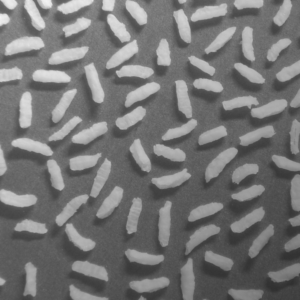

ㄴ 원본 영상


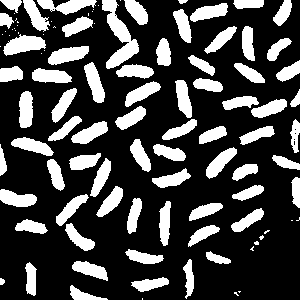

ㄴ otsu 이진화 적용


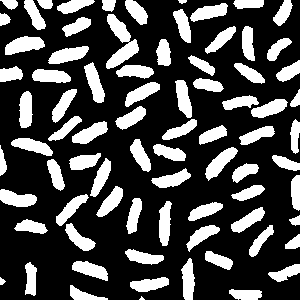

ㄴ top-hat 변환 후 otsu 이진화 적용


In [102]:
img = cv2.imread('Fig0940(a)(rice_image_with_intensity_gradient).tif', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5)
cv2_imshow(img)
print('ㄴ 원본 영상')

# Otsu 이진화
t, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(otsu)
print('ㄴ otsu 이진화 적용')

# Top-hat 변환으로 배경영상 추출 후 otsu 이진화
se = np.zeros((81, 81), dtype = np.uint8)
se = cv2.circle(se, (40, 40), 40, 1, -1) # 반지름이 40인 디스크 형태의 구조 요소 만들기
tophat = cv2.morphologyEx(img, cv2.MORPH_OPEN, se) # 열림 연산을 통해 배경 추출
tophat = img - tophat # 원본 - 배경
t, tophat_otsu = cv2.threshold(tophat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # top-hat 결과에 otsu 이진화 적용
cv2_imshow(tophat_otsu)
print('ㄴ top-hat 변환 후 otsu 이진화 적용')

# 비교
# otsu만 단독으로 사용했을 경우, 왼쪽 상단의 조명에 의해 가장 밝은 부분은 쌀알형태 주변으로 노이즈가 관찰된다.
# 또, 가장 어두운 오른쪽 하단에 위치한 쌀알은 탐지가 되지 않은 것을 확인할 수 있다.
# top-hat 변환 후, otsu 이진화를 사용했을 경우에는 밝은 부분의 노이즈가 사라지고, 어두운 부분의 쌀알도 제대로 검출되는 것을 확인할 수 있다.

### HW#2-10

In [48]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif'

--2025-04-11 12:50:09--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360678 (352K) [image/tiff]
Saving to: ‘Fig0943(a)(dark_blobs_on_light_background).tif’

Fig0943(a)(dark_blo 100%[===================>] 352.22K  --.-KB/s    in 0.007s  

2025-04-11 12:50:09 (51.2 MB/s) - ‘Fig0943(a)(dark_blobs_on_light_background).tif’ saved [360678/360678]



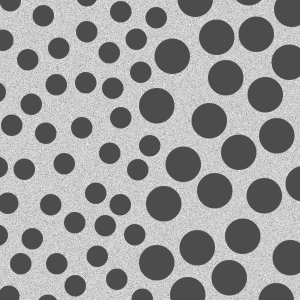

ㄴ 원본 영상


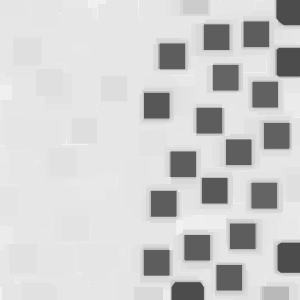

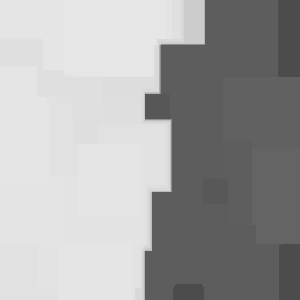

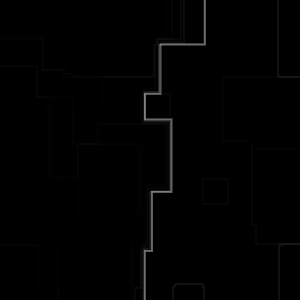

In [103]:
img = cv2.imread('Fig0943(a)(dark_blobs_on_light_background).tif', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5)
cv2_imshow(img)
print('ㄴ 원본 영상')

# 왼쪽의 작은 얼룩 지우기 - 왼쪽 얼룩보다 큰 구조요소로 닫힘 연산
se = np.ones((25, 25), np.uint8)
left_erased = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)
cv2_imshow(left_erased)

# 오른쪽의 큰 얼룩 지우기 - 오른쪽 얼룩 간격보다 큰 구조요소로 열림 연산
se = np.ones((60, 60), np.uint8)
right_erased = cv2.morphologyEx(left_erased, cv2.MORPH_OPEN, se)
cv2_imshow(right_erased)

# 얼룩을 지운 결과 영상에 morphological gradient 연산
se = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(right_erased, se, iterations = 1)
eroded = cv2.erode(right_erased, se, iterations = 1)
edge = dilated - eroded
cv2_imshow(edge)

